# Deutsch - Joza Algorithm

This algorithm is a quantum algorithm that determines with one oracle function evaluation whether it is balanced or constant.

For a test, I use the n-bit string function

$f(x) = \big(\sum_{x_i} x_i \big) \text{ mod } 2$

as an example of a balanced function (SOMETHING FAIRLY STRAIGHTFORWARD TO SEE). I set up a program that randomly maps n-bit strings to another n-bit string uniquely, so that the function evaluation seems random.

In [ ]:
! pip install qiskit

In [ ]:
import random as rd
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

In [ ]:
# Function for converting binary number to binary array
def num2bits(num, nbits):
  formt = '{0:0'+str(nbits)+'b}'
  return [int(x) for x in formt.format(int(num))]

num2bits(3,4)

[0, 0, 1, 1]

The cell below is the core of the notebook. ```MyOracle``` implements the oracle, and receives as argument whether the oracle is to be balanced or constant. The function ```dj_build``` simply implements the entire algorithm according to Nielsen and Chuang.

In [ ]:
def MyOracle(cases, circuit, inputsz):

  if cases == 'balanced':
    n = rd.randint(0,2**(inputsz-1))
    aux = num2bits(n,inputsz)
    circuit.barrier()
    # Introduce X gates to spice things up
    for idx in range(inputsz):
      if aux[idx] == 1:
        circuit.x(idx)
    circuit.barrier()
    # Compute sumation of all binary digits on binary chain
    for idx in range(inputsz):
      circuit.cx(idx,inputsz)
    circuit.barrier()
    # Uncompute changes to input qbits
    for idx in range(inputsz):
      if aux[idx] == 1:
        circuit.x(idx)
    circuit.barrier()
  
  else:
    n = rd.randint(0,1)
    circuit.barrier()
    if n == 1:
      circuit.x(inputsz)
    circuit.barrier()

def dj_build(cases, circuit, inputsz):

  # Initialize ouput register
  circuit.x(inputsz)
  circuit.barrier()

  # Compute hadamard transform
  for idx in range(inputsz+1):
    circuit.h(idx)
  circuit.barrier()

  # Include reversible oracle
  MyOracle(cases,circuit,inputsz)

  # Undo Hadamard transform on input register
  for idx in range(inputsz):
    circuit.h(idx)
  circuit.barrier()

  # Measure input register
  for idx in range(inputsz):
    circuit.measure(idx,idx)


Change ```n```in the cell below to see the magic of qiskit ;)

In [ ]:
n = 2
qc_deutsch = QuantumCircuit(n+1,n)
dj_build('balanced',qc_deutsch,n)
qc_deutsch.draw()

░ ┌───┐ ░  ░ ┌───┐ ░            ░ ┌───┐ ░ ┌───┐ ░ ┌─┐   
q_0: ──────░─┤ H ├─░──░─┤ X ├─░───■────────░─┤ X ├─░─┤ H ├─░─┤M├───
           ░ ├───┤ ░  ░ └───┘ ░   │        ░ └───┘ ░ ├───┤ ░ └╥┘┌─┐
q_1: ──────░─┤ H ├─░──░───────░───┼────■───░───────░─┤ H ├─░──╫─┤M├
     ┌───┐ ░ ├───┤ ░  ░       ░ ┌─┴─┐┌─┴─┐ ░       ░ └───┘ ░  ║ └╥┘
q_2: ┤ X ├─░─┤ H ├─░──░───────░─┤ X ├┤ X ├─░───────░───────░──╫──╫─
     └───┘ ░ └───┘ ░  ░       ░ └───┘└───┘ ░       ░       ░  ║  ║ 
c: 2/═════════════════════════════════════════════════════════╩══╩═
                                                              0  1

Notice that balanced functions only have one output string 1111... This is because of the particular oracle implemented. Other oracle might be designed such that strings with 0s can be measured with non zero probability. The reason this particular output occurs for this oracle is readily adverted by considering the deduction of the Deutsch - Joza algorithm. See if you can spot it ;)

In general, all the measured strings should have at least one 1, if the function is balanced. If the function is constant, then all the bits of the output should be 0.

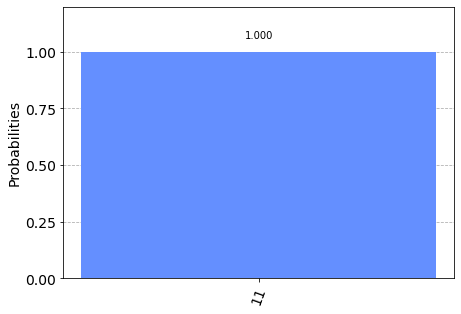

In [ ]:
counts = execute(qc_deutsch,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)